# RAPPORT Machine Learning 2025 
**Salmi Adam**

**Salzenstein Gaspar**

## Clustering

Le Clustering est une méthode d'apprentissage non-supervisée qui consiste au regroupement de données non labélisées en comparant leurs similarités/différences.

### K-Means

La méthode des K-Means est une façon (la plus logique du point de vue humain) de faire du Clustering. Cette méthode regroupe des "pôles" de points en essayant, par itération successive de minimiser la variance intra-cluster. Toutefois, cela suppose d'une part de connaître à l'avance le nombre de cluster et d'autre part les "pôles" doivent nécessairement être sphériques, ce qui limite beaucoup le type de données qui peut être utilisé avec cette méthode.

Appel K-Means pour plusieurs valeurs de k, sans soucis
nb clusters =  2 , 
	 sil_score =  0.6305972114000131 , 
	 davies_score =  0.541801330190927 , 
	 cal_score =  2386.4259543247335  , 
	 nb iter =  3  , 
	 runtime =  4.57  ms 
nb clusters =  3 , 
	 sil_score =  0.39525013998448194 , 
	 davies_score =  0.9525507538375505 , 
	 cal_score =  1576.8242720971991  , 
	 nb iter =  9  , 
	 runtime =  4.06  ms 
nb clusters =  4 , 
	 sil_score =  0.3561343416368105 , 
	 davies_score =  0.7820372639249841 , 
	 cal_score =  1401.5128174760953  , 
	 nb iter =  23  , 
	 runtime =  5.09  ms 
nb clusters =  5 , 
	 sil_score =  0.37329279574716395 , 
	 davies_score =  1.0127530497838144 , 
	 cal_score =  1359.2633426199047  , 
	 nb iter =  23  , 
	 runtime =  5.67  ms 
nb clusters =  6 , 
	 sil_score =  0.3816758442100559 , 
	 davies_score =  0.8617623849326613 , 
	 cal_score =  1454.2347784670449  , 
	 nb iter =  8  , 
	 runtime =  5.61  ms 
nb clusters =  7 , 
	 sil_score =  0.3952212844918314 , 


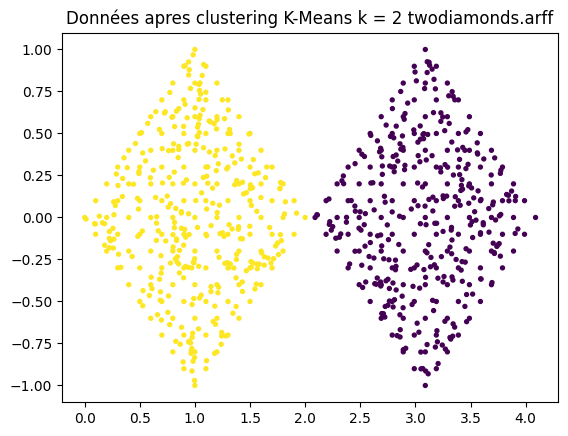

nb clusters =  2 , 
	 sil_score =  0.47418143741570656 , 
	 davies_score =  0.780883125430336 , 
	 cal_score =  412.59773916703585  , 
	 nb iter =  3  , 
	 runtime =  3.04  ms 
nb clusters =  3 , 
	 sil_score =  0.6171807766046922 , 
	 davies_score =  0.5159747512886118 , 
	 cal_score =  1204.3195506314394  , 
	 nb iter =  4  , 
	 runtime =  4.11  ms 
nb clusters =  4 , 
	 sil_score =  0.5349030089406274 , 
	 davies_score =  0.6705635171944188 , 
	 cal_score =  1054.477285352008  , 
	 nb iter =  7  , 
	 runtime =  4.06  ms 
nb clusters =  5 , 
	 sil_score =  0.4400380411643081 , 
	 davies_score =  0.7357541582940396 , 
	 cal_score =  1074.104626344683  , 
	 nb iter =  19  , 
	 runtime =  4.23  ms 
nb clusters =  6 , 
	 sil_score =  0.40840709116727225 , 
	 davies_score =  0.8999823434005338 , 
	 cal_score =  967.1009544553708  , 
	 nb iter =  20  , 
	 runtime =  5.07  ms 
nb clusters =  7 , 
	 sil_score =  0.40469647713658813 , 
	 davies_score =  0.8642294869630494 , 
	 cal_score =  10

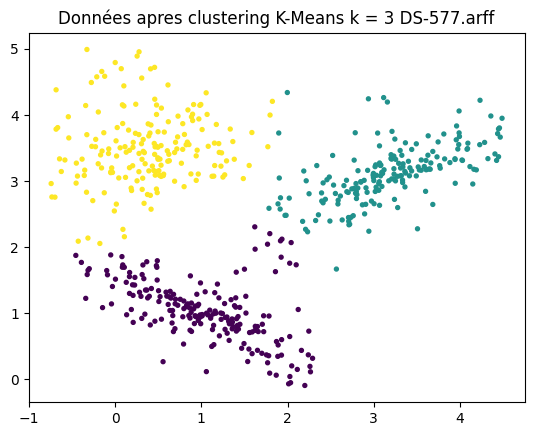

nb clusters =  2 , 
	 sil_score =  0.4312322443769002 , 
	 davies_score =  1.095247783773391 , 
	 cal_score =  765.8999585483798  , 
	 nb iter =  7  , 
	 runtime =  3.04  ms 
nb clusters =  3 , 
	 sil_score =  0.45766842013941833 , 
	 davies_score =  0.7075096213027807 , 
	 cal_score =  888.9337104233239  , 
	 nb iter =  3  , 
	 runtime =  4.06  ms 
nb clusters =  4 , 
	 sil_score =  0.5973265109573306 , 
	 davies_score =  0.5168282516187686 , 
	 cal_score =  2075.696525957616  , 
	 nb iter =  4  , 
	 runtime =  4.05  ms 
nb clusters =  5 , 
	 sil_score =  0.5080044513823314 , 
	 davies_score =  0.8000019069154224 , 
	 cal_score =  1738.5682989027682  , 
	 nb iter =  10  , 
	 runtime =  5.06  ms 
nb clusters =  6 , 
	 sil_score =  0.43132397771068903 , 
	 davies_score =  0.9309178009429472 , 
	 cal_score =  1554.7990171113197  , 
	 nb iter =  16  , 
	 runtime =  5.09  ms 
nb clusters =  7 , 
	 sil_score =  0.42154712382938225 , 
	 davies_score =  1.0989802894464267 , 
	 cal_score =  14

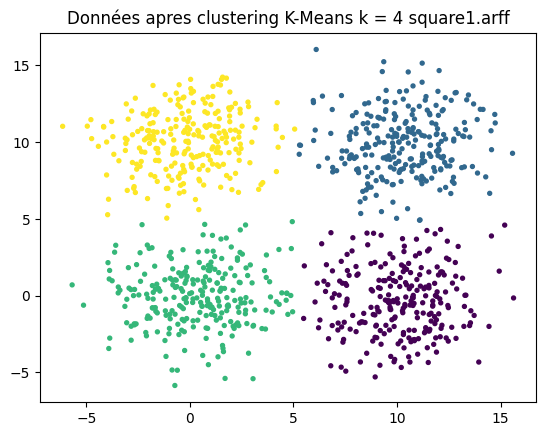

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import arff
import time
from sklearn import cluster

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

print("Appel K-Means pour plusieurs valeurs de k, sans soucis")

names = ["twodiamonds.arff", "DS-577.arff", "square1.arff"]
best_ks = []

for name in names:

    path = "./artificial/"
    databrut = arff.loadarff(open(path + name,'r', encoding='utf-8'))
    datanp = [[x[0], x[1]] for x in databrut [0]]

    f0 = np.array(datanp)[:,0]
    f1 = np.array(datanp)[:,1]  

    best_score = 0

    for k in range(2, 9):

        tps1 = time.time()
        model = cluster.KMeans(n_clusters=k, init = 'k-means++')
        model.fit(datanp)
        tps2 = time.time()

        labels = model.labels_
        iteration = model.n_iter_
        
        sil_score = silhouette_score(datanp, model.fit_predict(datanp))
        davies_score = davies_bouldin_score(datanp, model.fit_predict(datanp))
        cal_score = calinski_harabasz_score(datanp, model.fit_predict(datanp))

        if sil_score > best_score:
            best_score = sil_score
            best_k = k
            
        print ("nb clusters = ", k, 
               ", \n\t sil_score = ", sil_score, 
               ", \n\t davies_score = ", davies_score, 
               ", \n\t cal_score = ", cal_score, 
               " , \n\t nb iter = ", iteration, 
               " , \n\t runtime = ", round (( tps2 - tps1 ) * 1000 , 2 )," ms " ) 

    best_ks.append(best_k)
    model = cluster.KMeans(n_clusters=best_k, init='k-means++')
    model.fit(datanp)
    labels = model.labels_

    plt.scatter( f0, f1, c=labels, s=8)
    plt.title("Données apres clustering K-Means k = " + str(best_k) + " " + name)
    plt.show ()

Nous avons dans cette partie étudié 3 jeux de données adaptées pour le K-Means et ce avec un `k` allant de 2 à 8 avec une selection du meilleur `k` pour les 3 :
- **twodiamond**
- **DS-577**
- **square1**

Pour chacun des jeux de données, le `k`choisi est celui qui, sans lancer l'algorithme, nous parait le plus logique. On remarquera que l'algorithme converge assez rapidement (au plus 25 itérations), ce qui rend cet algorithme plutôt rapide (exécution jamais au-dessus des 5 ms).

Pour ces 3 jeu de données le résultats obtenu avec le K-Means est très satisfaisant.

Appel KMeans pour plusieurs valeurs de k, avec soucis

nb clusters =  2 ,
	score =  0.31795587166539757 ,
	nb iter =  6 ,
	runtime =  4.19  ms 
nb clusters =  3 ,
	score =  0.3427806741620822 ,
	nb iter =  6 ,
	runtime =  4.04  ms 
nb clusters =  4 ,
	score =  0.324024245144833 ,
	nb iter =  11 ,
	runtime =  5.07  ms 
nb clusters =  5 ,
	score =  0.29797846012629187 ,
	nb iter =  12 ,
	runtime =  5.05  ms 
nb clusters =  6 ,
	score =  0.36524096575063575 ,
	nb iter =  10 ,
	runtime =  5.56  ms 
nb clusters =  7 ,
	score =  0.33688313796507974 ,
	nb iter =  10 ,
	runtime =  5.05  ms 
nb clusters =  8 ,
	score =  0.3461157699918857 ,
	nb iter =  18 ,
	runtime =  6.94  ms 


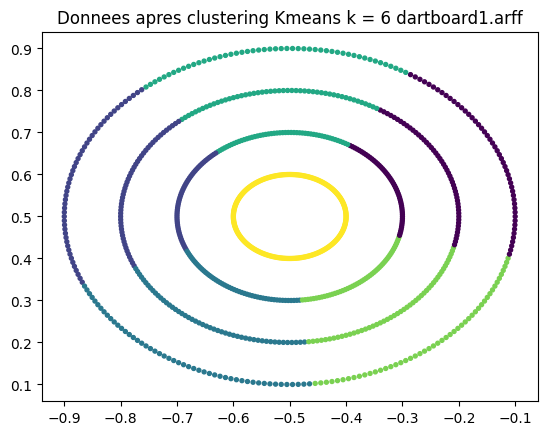

nb clusters =  2 ,
	score =  0.42924847438928077 ,
	nb iter =  9 ,
	runtime =  4.07  ms 
nb clusters =  3 ,
	score =  0.34955439482878803 ,
	nb iter =  16 ,
	runtime =  5.09  ms 
nb clusters =  4 ,
	score =  0.42156218947470825 ,
	nb iter =  6 ,
	runtime =  4.06  ms 
nb clusters =  5 ,
	score =  0.44012287796110344 ,
	nb iter =  13 ,
	runtime =  5.05  ms 
nb clusters =  6 ,
	score =  0.46819882822704306 ,
	nb iter =  30 ,
	runtime =  6.45  ms 
nb clusters =  7 ,
	score =  0.4859417703089196 ,
	nb iter =  17 ,
	runtime =  5.08  ms 
nb clusters =  8 ,
	score =  0.4726960455651708 ,
	nb iter =  8 ,
	runtime =  5.06  ms 


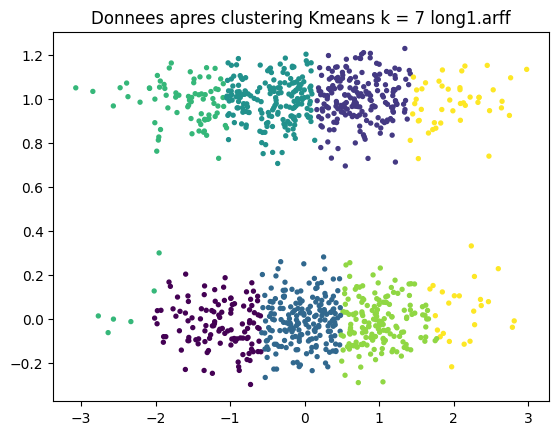

In [13]:
print("Appel KMeans pour plusieurs valeurs de k, avec soucis\n")

names = ["dartboard1.arff", "long1.arff"]
best_ks = []

for name in names:

    path = "./artificial/"
    databrut = arff.loadarff(open(path + name,'r', encoding='utf-8'))
    datanp = [[x[0], x[1]] for x in databrut [0]]

    f0 = np.array(datanp)[:,0]
    f1 = np.array(datanp)[:,1]  

    best_score = 0

    for k in range(2, 9):

        tps1 = time.time()
        model = cluster.KMeans(n_clusters=k, init = 'k-means++')
        model.fit(datanp)
        tps2 = time.time()

        labels = model.labels_
        iteration = model.n_iter_
        
        score = silhouette_score(datanp, model.fit_predict(datanp))

        if score > best_score:
            best_score = score
            best_k = k

        print ("nb clusters = ", k,
                ",\n\tscore = ", score,
                ",\n\tnb iter = ", iteration, 
                ",\n\truntime = ", round (( tps2 - tps1 ) * 1000 , 2 ) ," ms " ) 

    best_ks.append(best_k)
    model = cluster.KMeans(n_clusters=best_k, init='k-means++')
    model.fit(datanp)
    labels = model.labels_

    plt.scatter(f0, f1, c=labels, s=8)
    plt.title("Donnees apres clustering Kmeans k = " + str(best_k) + " " + name)
    plt.show()

Pareil qu'a la section précédente nous avons analysé les résultats avec un K-Means sur 2 jeu de données, cette fois ci plus problématique :
- **dartboard1 :** Les points de données forment des cercles, en regardant le choix apporté par l'algorithme (`k = 8`), il est évident que le choix n'est pas le bons puisque l'on observe 4 cercles distincts.
- **long1 :** Encore ici, le choix de `k = 8` ne parait pas bon, humainement on aperçois 2 nuages de points.

À travers ces 2 jeux de données, on observe très bien le problème du K-Means. Il est très sensible à la géométrie des données et suppose ses clusters comme étant sphériques (l'utilisation de la norme euclidienne est un problème, c.f. le 2nd exemple où le nuage de points est étiré).

En conclusion le K-Means est très efficace (en terme de prédiction et de temps d'entraînement) mais cela à un prix : celui de n'absoluement pas être flexible à la structure des données.

## AGGLOMERATIVE

 Dendrogramme 'single' donnees initiales 


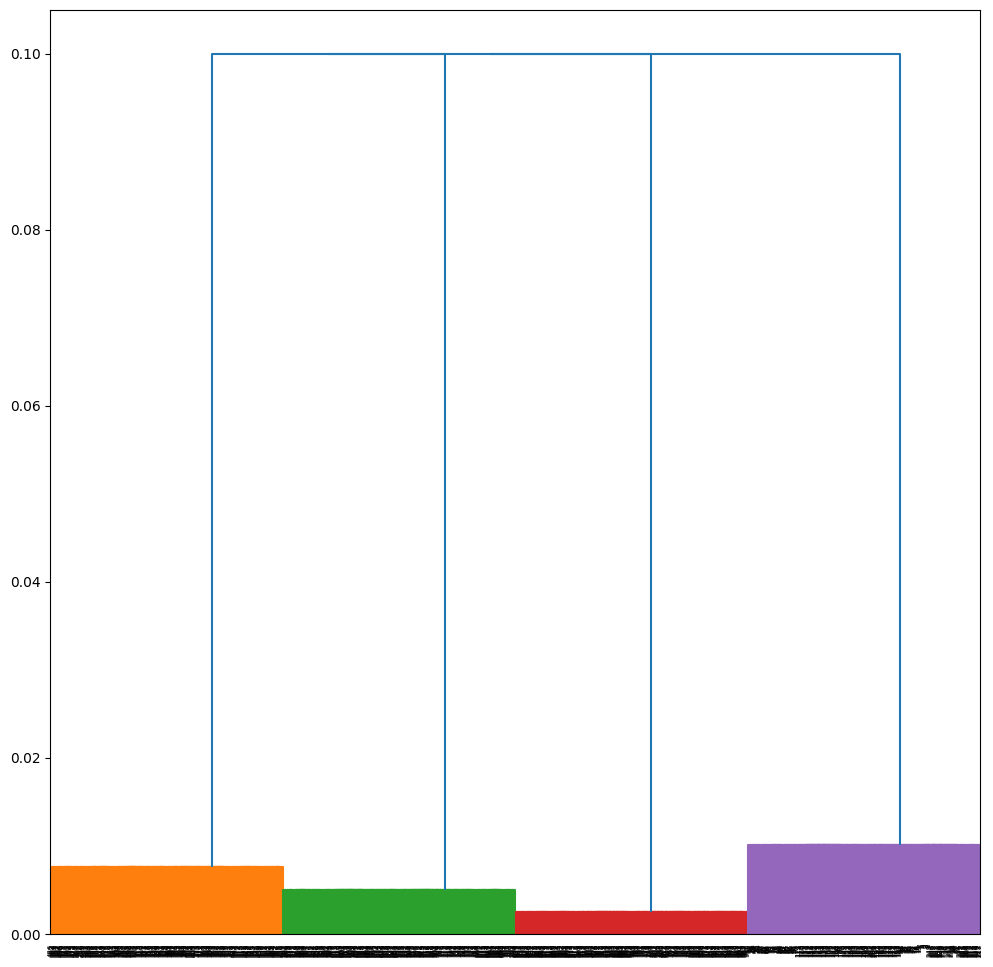

In [ ]:
import scipy . cluster . hierarchy as shc

path = "./artificial/dartboard1.arff"
databrut = arff.loadarff(open(path,'r', encoding='utf-8'))
datanp = [[x[0], x[1]] for x in databrut [0]]

f0 = np.array(datanp)[:,0]
f1 = np.array(datanp)[:,1] 

print(" Dendrogramme 'single' donnees initiales ")
linked_mat = shc.linkage(datanp, 'single')
plt.figure(figsize=(12,12))
shc.dendrogram(linked_mat, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.show()

J'ai utilisé le dendogramme pour déduire la distance threshold pour avoir un truc bien, donc 0.02 (ça aurait pu etre 0.08 ou 0.06)

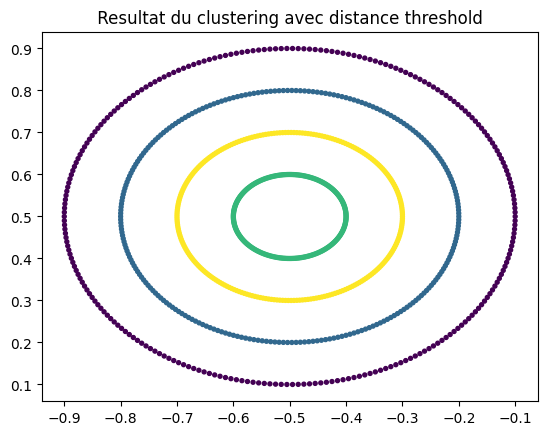

 nb clusters =  4 
	nb feuilles =  1000 
	runtime =  5.1  ms 


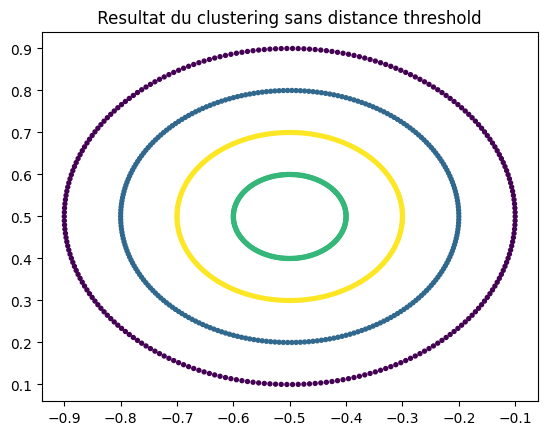

 nb clusters =  4 
	nb feuilles =  1000 
	runtime =  5.09  ms 


In [37]:
tps1 = time.time()
model = cluster.AgglomerativeClustering(distance_threshold=0.02, linkage='single', n_clusters=None)
model = model.fit(datanp)
tps2 = time.time()

labels = model.labels_
k = model.n_clusters_
leaves = model.n_leaves_

plt.scatter(f0, f1, c=labels, s=8)
plt.title(" Resultat du clustering avec distance threshold ")
plt.show()

print(" nb clusters = ", k, 
      "\n\tnb feuilles = ", leaves, 
      "\n\truntime = ", round((tps2 - tps1)*1000, 2), " ms ")

k = 4

tps1 = time.time()
model = cluster.AgglomerativeClustering(linkage='single', n_clusters=k)
model = model.fit(datanp)
tps2 = time.time()

labels = model.labels_
kres = model.n_clusters_
leaves = model.n_leaves_

plt.scatter(f0, f1, c=labels, s=8)
plt.title(" Resultat du clustering sans distance threshold ")
plt.show()

print(" nb clusters = ", k, 
      "\n\tnb feuilles = ", leaves, 
      "\n\truntime = ", round((tps2 - tps1)*1000, 2), " ms ")

### AUTOMATING

Du coup j'ai fait un truc pour automatiser pour trouver la threshold. Bon, pour les deux trucs qu'on a c'est pas ouf parce que c'est que single qui gagne mais en soit c'est normal je crois, faudrait trouver un autre jeu de données intéressant

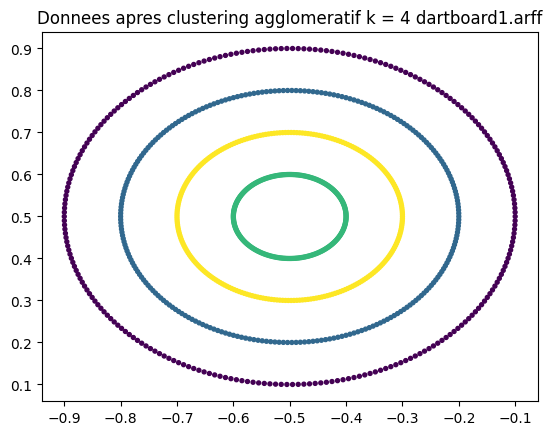

 nb clusters =  6 
	nb feuilles =  1000 
	combination method =  single 
	davies score =  0.0 
	runtime =  5.07  ms 


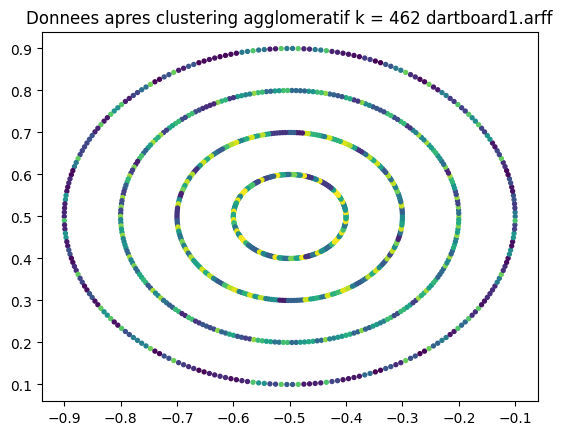

 nb clusters =  6 
	nb feuilles =  1000 
	combination method =  complete 
	davies score =  0.46154292912395206 
	runtime =  12.32  ms 


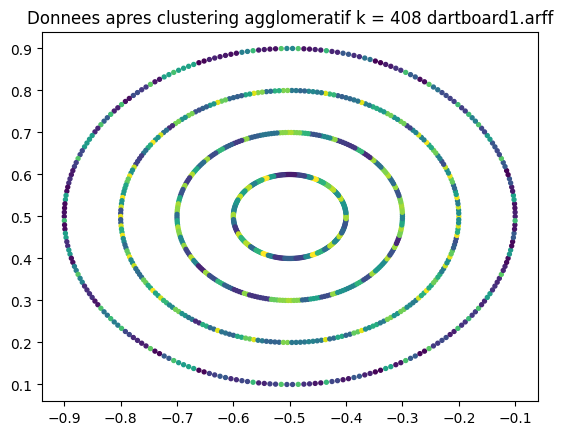

 nb clusters =  6 
	nb feuilles =  1000 
	combination method =  average 
	davies score =  0.4589888888426652 
	runtime =  13.17  ms 


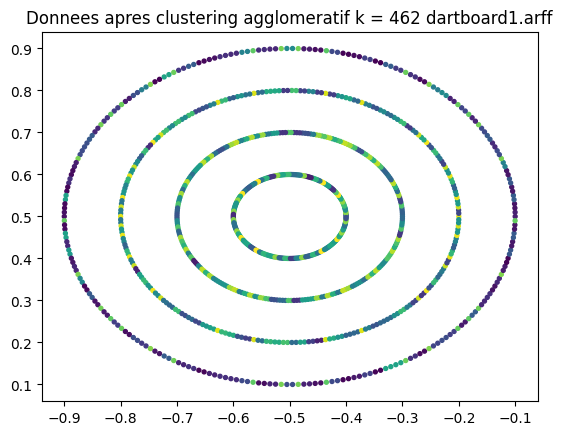

 nb clusters =  6 
	nb feuilles =  1000 
	combination method =  ward 
	davies score =  0.4615044912260269 
	runtime =  12.94  ms 

BEST COMBINATION =  single

////////////////////////////////////////////////////////////////////////////////////////////////////



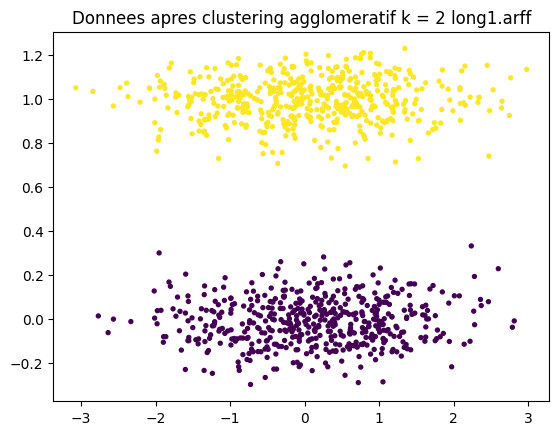

 nb clusters =  6 
	nb feuilles =  1000 
	combination method =  single 
	davies score =  1.6801469451226598 
	runtime =  5.07  ms 


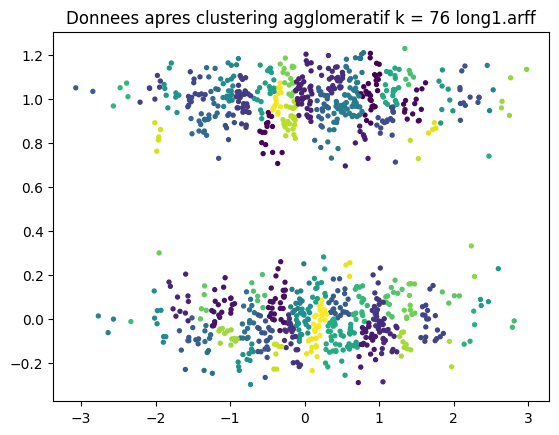

 nb clusters =  6 
	nb feuilles =  1000 
	combination method =  complete 
	davies score =  0.7637136806016371 
	runtime =  10.63  ms 


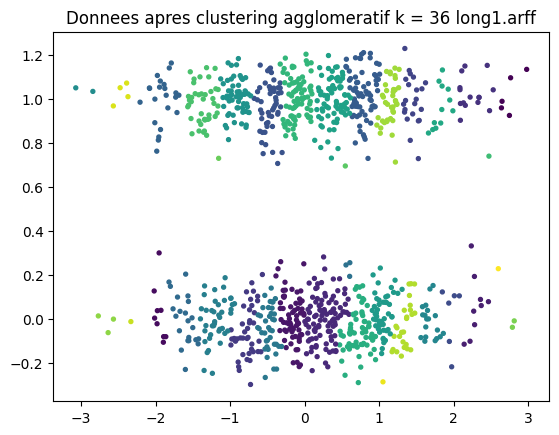

 nb clusters =  6 
	nb feuilles =  1000 
	combination method =  average 
	davies score =  0.6252518624151764 
	runtime =  10.13  ms 


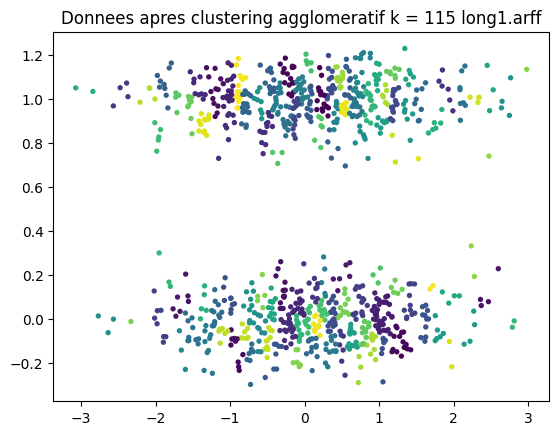

 nb clusters =  6 
	nb feuilles =  1000 
	combination method =  ward 
	davies score =  0.7329799621509558 
	runtime =  12.18  ms 

BEST COMBINATION =  single

////////////////////////////////////////////////////////////////////////////////////////////////////



In [78]:
names = ["dartboard1.arff", "long1.arff"]
combinations = ['single', 'complete', 'average', 'ward']
best_combination = 'single'

for name in names:

  path = "./artificial/"
  databrut = arff.loadarff(open(path + name,'r', encoding='utf-8'))
  datanp = [[x[0], x[1]] for x in databrut [0]]

  f0 = np.array(datanp)[:,0]
  f1 = np.array(datanp)[:,1]

  linked_mat = shc.linkage(datanp, 'single')
  distances = linked_mat[:, 2]

  diffs = np.diff(distances)
  threshold = (distances[np.argmax(diffs)]) + 1e-5

  for combination in combinations:

    tps1 = time.time()
    model = cluster.AgglomerativeClustering(distance_threshold=threshold, linkage=combination, n_clusters=None)
    model = model.fit(datanp)
    tps2 = time.time()

    labels = model.labels_

    plt.scatter(f0, f1, c=labels, s=8)
    plt.title("Donnees apres clustering agglomeratif k = " + str(model.n_clusters_) + " " + name)
    plt.show()

    davies_score = davies_bouldin_score(datanp, model.fit_predict(datanp))

    if davies_score > best_score:
        best_score = davies_score
        best_combination = combination

    print(" nb clusters = ", k, 
      "\n\tnb feuilles = ", leaves,
      "\n\tcombination method = ", combination, 
      "\n\tdavies score = ", davies_score, 
      "\n\truntime = ", round((tps2 - tps1)*1000, 2), " ms ")
    
  print("\nBEST COMBINATION = ", best_combination)
  print("\n////////////////////////////////////////////////////////////////////////////////////////////////////\n")

Pour utiliser le clustering agglomeratif et de le maximiser avec un score on peut pas utiliser le silhouette ou le calinski à cause de leurs hypothèses en terme de géometrie de clusters

Je sais pas ce que tu penses ça """marche""" avec davies mais du coup pour utiliser des meilleures metriques faudrait avoir accès aux "true labels" 

j'ai pas mis le truc avec les différents linkage trucs machins, à voir si ça t'intéresserait ou pas (pour moi ça ferait la même chose)

nb clusters =  2 , 
	 davies_score =  0.0  , 
	 nb iter =  29  , 
	 runtime =  4.05  ms 
nb clusters =  3 , 
	 davies_score =  0.0  , 
	 nb iter =  29  , 
	 runtime =  5.06  ms 
nb clusters =  4 , 
	 davies_score =  0.0  , 
	 nb iter =  29  , 
	 runtime =  5.07  ms 
nb clusters =  5 , 
	 davies_score =  2.9640775052381008  , 
	 nb iter =  29  , 
	 runtime =  4.05  ms 
nb clusters =  6 , 
	 davies_score =  1.7835073740869545  , 
	 nb iter =  29  , 
	 runtime =  5.07  ms 


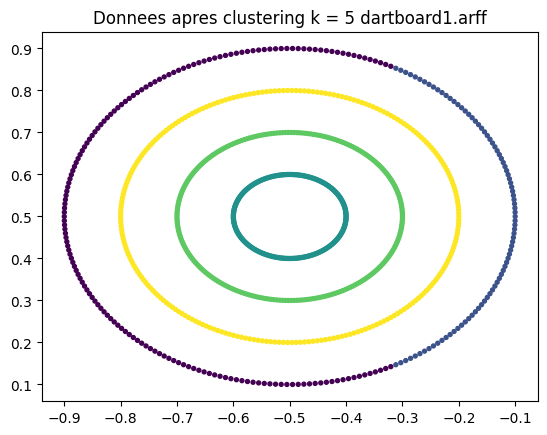


////////////////////////////////////////////////////////////////////////////////////////////////////

nb clusters =  2 , 
	 davies_score =  1.6801469451226598  , 
	 nb iter =  29  , 
	 runtime =  6.09  ms 
nb clusters =  3 , 
	 davies_score =  1.2187529857158392  , 
	 nb iter =  29  , 
	 runtime =  5.07  ms 
nb clusters =  4 , 
	 davies_score =  0.9941488457512839  , 
	 nb iter =  29  , 
	 runtime =  6.08  ms 
nb clusters =  5 , 
	 davies_score =  0.8559897616779294  , 
	 nb iter =  29  , 
	 runtime =  5.07  ms 
nb clusters =  6 , 
	 davies_score =  0.7644268062734296  , 
	 nb iter =  29  , 
	 runtime =  6.08  ms 


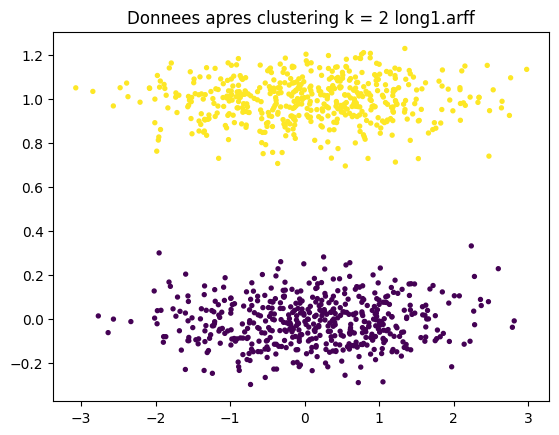


////////////////////////////////////////////////////////////////////////////////////////////////////



In [77]:
best_ks = []

for name in names:

    path = "./artificial/"
    databrut = arff.loadarff(open(path + name,'r', encoding='utf-8'))
    datanp = [[x[0], x[1]] for x in databrut [0]]

    f0 = np.array(datanp)[:,0]
    f1 = np.array(datanp)[:,1]

    best_score = 0

    for k in range(2, 7):

        tps1 = time.time()
        model = cluster.AgglomerativeClustering(linkage='single', n_clusters=k)
        model = model.fit(datanp)
        tps2 = time.time()

        leaves = model.n_leaves_        
        davies_score = davies_bouldin_score(datanp, model.fit_predict(datanp))

        if davies_score > best_score:
            best_score = davies_score
            best_k = k
            
        print ("nb clusters = ", k, 
               ", \n\t davies_score = ", davies_score, 
               " , \n\t nb iter = ", iteration, 
               " , \n\t runtime = ", round (( tps2 - tps1 ) * 1000 , 2 )," ms " ) 

    best_ks.append(best_k)
    model = cluster.AgglomerativeClustering(linkage='single', n_clusters=best_k)
    model = model.fit(datanp)
    labels = model.labels_

    plt.scatter(f0, f1, c=labels, s=8)
    plt.title("Donnees apres clustering k = " + str(best_k) + " " + name)
    plt.show()

    print("\n////////////////////////////////////////////////////////////////////////////////////////////////////\n")